# Using libCacheSim to analyze and plot the trace

In this tutorial, we show how to use [trace analysis tool](https://github.com/1a1a11a/libCacheSim/blob/develop/doc/quickstart_traceAnalyzer.md) from libCacheSim  to analyze and plot the trace.

libCacheSim provides a set of tools to help you analyze traces. After building the project, you can find a binary called traceAnalyzer. This doc shows how to use the tool. If you are interested, the source code is located in the `bin/traceAnalyzer/` and `traceAnalyzer` directory.

## Step 0. Install libCacheSim and download example dataset

Run script to install libCacheSim and download example dataset.

In [12]:
from IPython.display import clear_output
import subprocess

subprocess.run(["bash", "install.sh"])
subprocess.run(["bash", "download.sh"])

# Install the required packages
%pip install -r  "./libCacheSim/requirements.txt"
%pip install scipy

clear_output()

## Step 1. Obtain trace statistics

#### Usage: 
```
# ./bin/traceAnalyzer --help for a list of tasks and options
./bin/traceAnalyzer PATH_TO_TRACE traceType [--task1] [--task2]
```

#### A list of tasks:
* `--common`: run all common tasks, including `--stat`, `--traceStat`, `--reqRate`, `--size`, `--reuse`, `--popularity`
* `--all`: run all tasks
* `--accessPattern`: generate access pattern data for plotting using [scripts/traceAnalysis/access_pattern.py](/scripts/traceAnalysis/access_pattern.py)
* `--reqRate`: generate request rate data for plotting using [scripts/traceAnalysis/req_rate.py](/scripts/traceAnalysis/req_rate.py)
* `--size`: generate size distribution data for plotting using [scripts/traceAnalysis/size.py](/scripts/traceAnalysis/size.py) and [scripts/traceAnalysis/size_heatmap.py](/scripts/traceAnalysis/size_heatmap.py)
* `--reuse`: generate reuse distribution data for plotting using [scripts/traceAnalysis/reuse.py](/scripts/traceAnalysis/reuse.py) and [scripts/traceAnalysis/reuse_heatmap.py](/scripts/traceAnalysis/reuse_heatmap.py)
* `--popularity`: generate popularity data for plotting using [scripts/traceAnalysis/popularity.py](/scripts/traceAnalysis/popularity.py)
* `--popularityDecay`: generate popularity data for plotting using [scripts/traceAnalysis/popularity_decay.py](/scripts/traceAnalysis/popularity_decay.py)


In [13]:
import subprocess

In [14]:
dataname = "w89.oracleGeneral.bin.zst"

subprocess.run(["./libCacheSim/_build/bin/traceAnalyzer", f"./{dataname}", "oracleGeneral", "--all"])

dat: ./w89.oracleGeneral.bin.zst
number of requests: 3625918, number of objects: 770712
number of req GiB: 62.0231, number of obj GiB: 21.8123
compulsory miss ratio (req/byte): 0.2126/0.3517
object size weighted by req/obj: 18366/30388
frequency mean: 4.7046
time span: 607175(7.0275 day)
op: nop:3625918(1.0000), get:0(0.0000), gets:0(0.0000), set:0(0.0000), add:0(0.0000), cas:0(0.0000), replace:0(0.0000), append:0(0.0000), prepend:0(0.0000), delete:0(0.0000), incr:0(0.0000), decr:0(0.0000), read:0(0.0000), write:0(0.0000), update:0(0.0000), invalid:0(0.0000), request rate min 1.7667 req/s, max 734.5167 req/s, window 300s
object rate min 0.5967 obj/s, max 706.8200 obj/s, window 300s
popularity: Zipf linear fitting slope=0.8560, intercept=-1.0000, R2=-1.0000
X-hit (number of obj accessed X times): 420771(0.5460), 171712(0.2228), 28892(0.0375), 18226(0.0236), 12638(0.0164), 11142(0.0145), 10419(0.0135), 26592(0.0345), 
freq (fraction) of the most popular obj: 108376(0.0299), 108373(0.0299

CompletedProcess(args=['./libCacheSim/_build/bin/traceAnalyzer', './w89.oracleGeneral.bin.zst', 'oracleGeneral', '--all'], returncode=0)

## Step 2. Plot the trace

### Plot trace statistics and visualize the trace
We provide plot scripts in [scripts/traceAnalysis/](/scripts/traceAnalysis/) to help you plot the trace statistics.
After generating plot data, we can plot access pattern, request rate, size, reuse, and popularity using the following commands:


#### Access pattern


In [15]:
subprocess.run(["python", "libCacheSim/scripts/traceAnalysis/access_pattern.py", f"{dataname}.accessRtime"])
subprocess.run(["python", "libCacheSim/scripts/traceAnalysis/access_pattern.py", f"{dataname}.accessVtime"])

CompletedProcess(args=['python', 'libCacheSim/scripts/traceAnalysis/access_pattern.py', 'w89.oracleGeneral.bin.zst.accessVtime'], returncode=0)

A block cache workload (w89). The first shows wall clock time, this workload is mostly driven by a daily scan; the second shows virtual (request count) time.

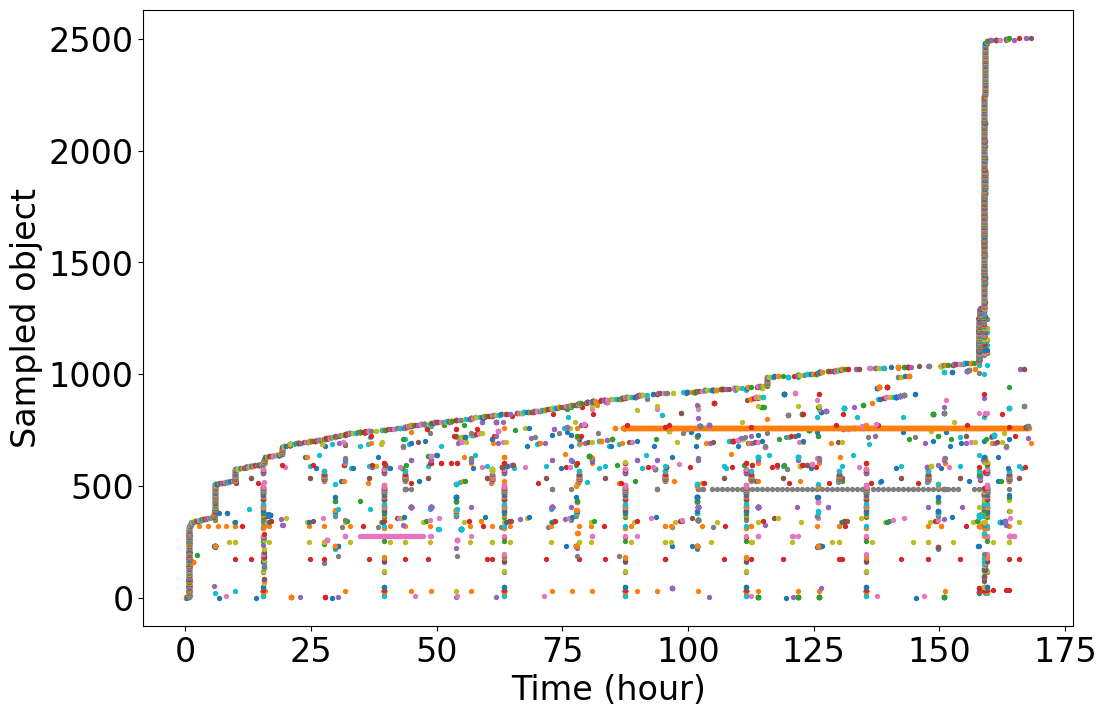

In [16]:
from IPython.display import Image
Image(filename='./figure/w89_access_rt.png', width=400)  # Adjust width as needed

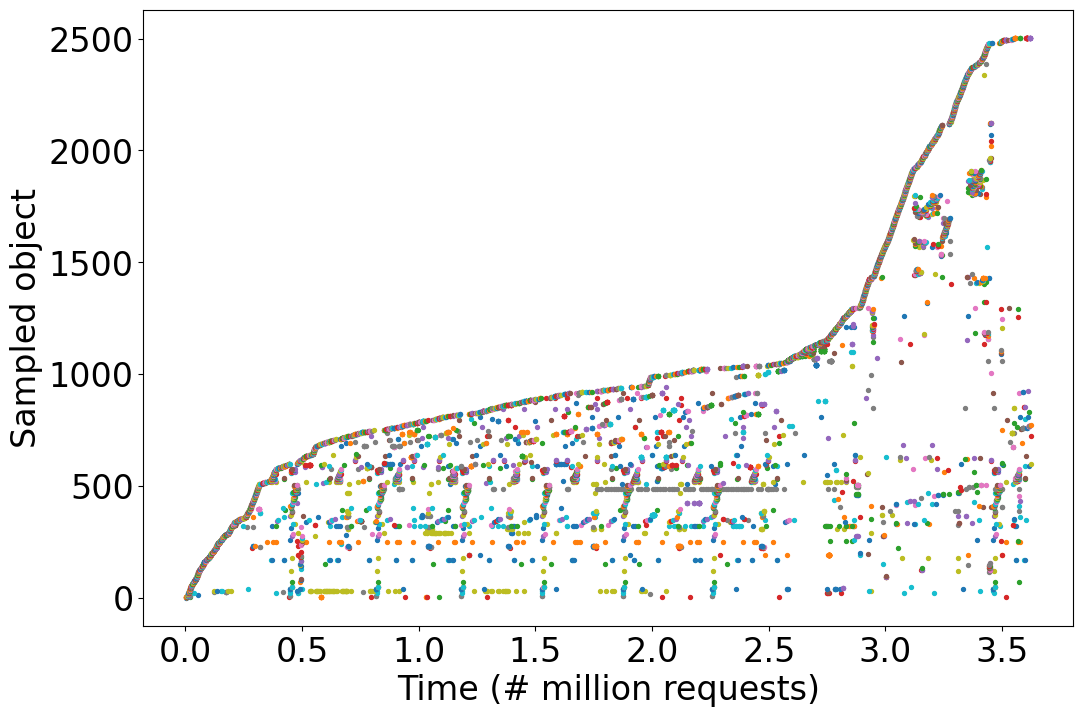

In [17]:
Image(filename='./figure/w89_access_vt.png', width=400)  # Adjust width as needed

Here are more examples.


#### Request rate
```bash
# this is only supported for traces that have (wall clock) time field
python3 scripts/traceAnalysis/req_rate.py ${dataname}.reqRate_w300
```

Some example plots are shown below:
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_reqRate.svg" alt="request rate w92" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_reqRate.svg" alt="request rate twitter" width="40%">
</div>
<div style="text-align: center; color: grey;">
Left: a block cache workload (w92), right: the first 10m requests of the Twitter cluster52 trace. <br>
The block workload has a daily request spike, while the Twitter workload is too short to observe a pattern. 
</div>
<br>


#### Size distribution
```bash
# this is only supported for traces that have object size
python3 scripts/traceAnalysis/size.py ${dataname}.size
```

Some example plots are shown below:
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_size.svg" alt="size w92" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_size_log.svg" alt="size twitter" width="40%">
</div>
<div style="text-align: center; color: grey;">
Left: a block cache workload (w92), right: the first 10m requests of the Twitter cluster52 trace. <br>
The block workload has most objects being 4 KiB and 64 KiB, while the Twitter workload has most objects being 64 B. <br>
The Request curve is weighted by request count, and the Object curve is weighted by object count. 
</div>
<br>


#### Reuse distribution
This is the time since the last access of the object.

```bash
python3 scripts/traceAnalysis/reuse.py ${dataname}.reuse
```

Some example plots are shown below 
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_reuse_rt_log.svg" alt="reuse w92_r" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_reuse_vt_log.svg" alt="reuse w92_v" width="40%">
</div>
<div style="text-align: center; color: grey;">
A block cache workload (w92). The left column shows wall clock time, the right column shows virtual (request count) time. Most reuses happen around one day.
</div>
<br>

<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_reuse_rt.svg" alt="reuse twitter_r" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_reuse_vt_log.svg" alt="reuse twitter_v" width="40%">
</div>

<div style="text-align: center; color: grey;">
The first 10m requests of the Twitter cluster52 trace. The left column shows wall clock time, the right column shows virtual (request count) time. Most requests happen soon after the object is accessed. 
</div>
<br>

#### Popularity
```bash
# the popularity skewness ($\alpha$) is in the output of traceAnalyzer
# this plots the request count/freq over object rank
# note that measuring popularity plot does not make sense for very small traces and some block workloads  
# and note that popularity is highly affected by the layer of the cache hierarchy
python3 scripts/traceAnalysis/popularity.py ${dataname}.popularity
```

Some example plots are shown below:
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_pop_rank.svg" alt="popularity twitter" width="40%">
</div>
<div style="text-align: center; color: grey;">
The first 10m requests of the Twitter cluster52 trace. <br>
</div>
<br>





#### Size distribution heatmap
This and the following plots are more expensive plots that require more CPU cycles and DRAM usage to generate. 
This plot requires wall clock time and object size in the trace. 
This is a heatmap of the size distribution of the trace. The x-axis is the clock time, and the y-axis is the size. The color represents the number of requests having a certain size range at that time. The darker the color, the more requests of the certain size at that time. 
The heatmap is generated using the following command:

```bash
python3 scripts/traceAnalysis/size_heatmap.py ${dataname}.sizeWindow_w300
```

Some example plots are shown below:
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_size_heatmap_req.svg" alt="popularity w92" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_size_heatmap_req.svg" alt="popularity twitter" width="40%">
</div>
<div style="text-align: center; color: grey;">
Left: a block cache workload (w92), right: the first 10m requests of the Twitter cluster52 trace. The two plots show the distribution weighted by request, there are also two figures weighted by object count. <br>
</div>
<br>


#### Reuse distribution heatmap
This is a heatmap of the reuse distribution of the trace. The x-axis is the wall clock time, and the y-axis is the reuse time (in seconds) or reuse distance (the number of requests since last access of the object). The color represents the number of requests having the reuse time or reuse distance. 
The heatmap is generated using the following command:

```bash
python3 scripts/traceAnalysis/reuse_heatmap.py ${dataname}.reuseWindow_w300
```

Some example plots are shown below:
<div style="display: flex; justify-content: center; align-items: center;">
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/w92_reuse_heatmap_vt.svg" alt="popularity w92" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://raw.githubusercontent.com/1a1a11a/libCacheSim/refs/heads/develop/doc/plot/twitter_cluster52_10m_reuse_heatmap_vt.svg" alt="popularity twitter" width="40%">
</div>
<div style="text-align: center; color: grey;">
Left: a block cache workload (w92), right: the first 10m requests of the Twitter cluster52 trace. <br>
</div>
<br>


#### popularity decay
There are two versions of the plots, one is line plot, and the other is a heatmap.

```bash
# this requires a long trace (e.g., 7 day) to generate a meaningful plot
# and most block workloads do not have enough requests to plot meaningful popularity decay
python3 scripts/traceAnalysis/popularity_decay.py ${dataname}.popularityDecay_w300_obj
```